In [1]:
import wellmap
import pandas as pd
import os

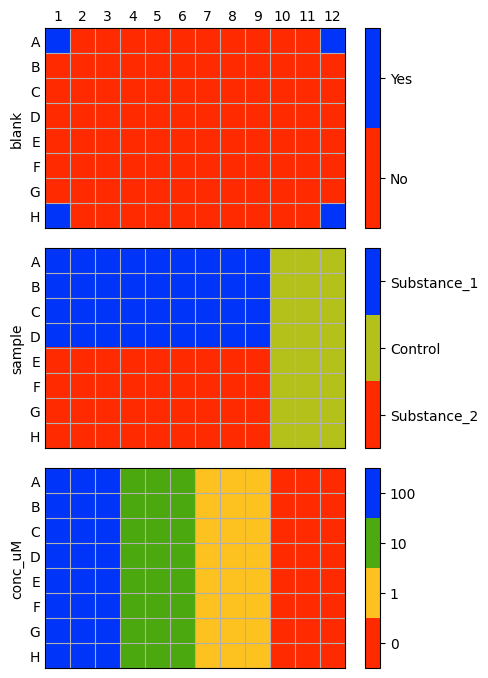

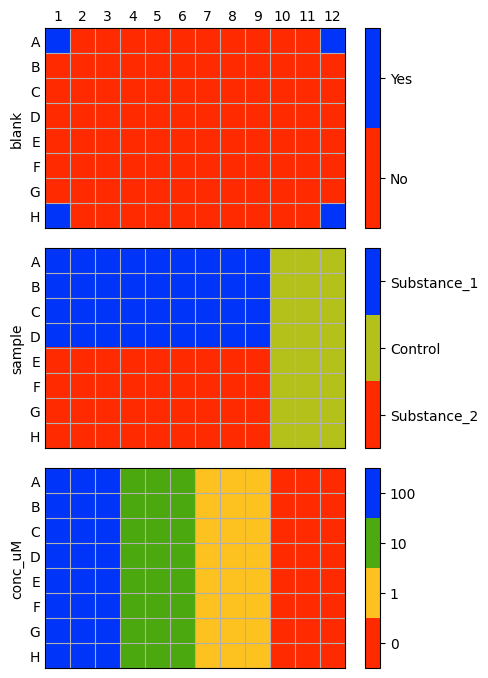

In [24]:
# wellmap.show("2 substance 1 plate.toml")
wellmap.show("sph_dif_number.toml")

In [12]:
path_to_data = r"C:\Users\Modern\Documents\Biorad\Test\MyExpt_Wells.csv"

data = pd.read_csv(path_to_data) 

print(data.columns)


Index(['ImageNumber', 'ObjectNumber', 'Intensity_MaxIntensity_OrigGreen',
       'Intensity_MaxIntensity_OrigRed', 'Intensity_MeanIntensity_OrigGreen',
       'Intensity_MeanIntensity_OrigRed', 'Intensity_MinIntensity_OrigGreen',
       'Intensity_MinIntensity_OrigRed', 'Intensity_StdIntensity_OrigGreen',
       'Intensity_StdIntensity_OrigRed', 'Number_Object_Number'],
      dtype='object')
